In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install yfinance

  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 262.6 kB/s eta 0:00:12
     ---------------------------------------- 0.0/3.0 MB 262.6 kB/s eta 0:00:12
      --------------------------------------- 0.0/3.0 MB 179.6 kB/s eta 0:00:17
      --------------------------------------- 0.0/3.0 MB 179.6 kB/s eta 0:00:17
      --------------------------------------- 0.1/3.0 MB 193.2 kB/s eta 0:00:15
      --------------------------------------- 0.1/3.0 MB 193.2 kB/s eta 0:00:15
     - -------------------------------------- 0.1/3.0 MB 191.1 kB/s eta 0:00:16
     - -----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import tensorflow as tf
import keras
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check TensorFlow version
print("TensorFlow Version: ", tf.__version__)

TensorFlow Version:  2.16.1


In [2]:
# Fetch AAPL data
aapl_data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

# Display the first few rows of the dataframe
aapl_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960464,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251144,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826851,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484352,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650352,132079200


In [3]:
aapl_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.024185,42628800


In [4]:
aapl_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1006 non-null   float64
 1   High       1006 non-null   float64
 2   Low        1006 non-null   float64
 3   Close      1006 non-null   float64
 4   Adj Close  1006 non-null   float64
 5   Volume     1006 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.0 KB


In [5]:
aapl_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
#Checking missing values
aapl_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# Filling missing values, if any
aapl_data.fillna(method='ffill', inplace=True)

C:\Users\kiokh\AppData\Local\Temp\ipykernel_14048\4052766006.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aapl_data.fillna(method='ffill', inplace=True)


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
aapl_data_scaled = scaler.fit_transform(aapl_data['Close'].values.reshape(-1,1))

In [9]:
X = []
y = []

for i in range(60, len(aapl_data_scaled)):
    X.append(aapl_data_scaled[i-60:i, 0])
    y.append(aapl_data_scaled[i, 0])

In [10]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [11]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [24]:
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))

IndexError: tuple index out of range

In [22]:
y_train

array([0.05358495, 0.05266956, 0.02911614, 0.03619272, 0.02999632,
       0.06706921, 0.06171774, 0.07340647, 0.0767863 , 0.08604574,
       0.1103385 , 0.1057264 , 0.1097048 , 0.10285703, 0.0925238 ,
       0.07745524, 0.09106274, 0.08917916, 0.10315631, 0.1035084 ,
       0.09542836, 0.11153558, 0.12222084, 0.11389443, 0.12109424,
       0.12883976, 0.13424403, 0.13971869, 0.15096733, 0.15955782,
       0.15322057, 0.14660165, 0.14992873, 0.14670726, 0.15946978,
       0.15626599, 0.16698649, 0.16279686, 0.16638798, 0.16258562,
       0.16501486, 0.16526133, 0.16471563, 0.17159859, 0.17422149,
       0.1773549 , 0.17242595, 0.18858592, 0.19203618, 0.21057263,
       0.22615171, 0.19633143, 0.20143643, 0.20881228, 0.22481383,
       0.22395127, 0.22419775, 0.22065943, 0.23676659, 0.25025085,
       0.23886141, 0.24727586, 0.22754239, 0.24188921, 0.24720543,
       0.24599079, 0.24599079, 0.2631366 , 0.26109459, 0.27637439,
       0.27926138, 0.28044078, 0.27732499, 0.28845039, 0.29315

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, AdditiveAttention, Permute, Reshape, Multiply

model = Sequential()

# Adding LSTM layers with return_sequences=True
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))

c:\Users\kiokh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile()

In [13]:
# Adding self-attention mechanism
# The attention mechanism
attention = AdditiveAttention(name='attention_weight')

In [14]:
model.add(Permute((2, 1)))

In [15]:
model.add(Reshape((-1, X_train.shape[1])))

In [16]:
attention_result = attention([model.output, model.output])

ValueError: The layer sequential has never been called and thus has no defined output.

In [27]:
# Adding self-attention mechanism
# The attention mechanism
attention = AdditiveAttention(name='attention_weight')
# Permute and reshape for compatibility
model.add(Permute((2, 1))) 
model.add(Reshape((-1, X_train.shape[1])))
attention_result = attention([model.output, model.output])
multiply_layer = Multiply()([model.output, attention_result])
# Return to original shape
model.add(Permute((2, 1))) 
model.add(Reshape((-1, 50)))

ValueError: The layer sequential has never been called and thus has no defined output.

In [22]:
# Adding self-attention mechanism
# The attention mechanism
attention = AdditiveAttention(name='attention_weight')
# Permute and reshape for compatibility
model.add(Permute((2, 1))) 
model.add(Reshape((-1, X_train.shape[1])))
attention_result = attention([model.output, model.output])
multiply_layer = Multiply()([model.output, attention_result])
# Return to original shape
model.add(Permute((2, 1))) 
model.add(Reshape((-1, 50)))

# Adding a Flatten layer before the final Dense layer
model.add(tf.keras.layers.Flatten())

# Final Dense layer
model.add(Dense(1))

# Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)

ValueError: The layer sequential has never been called and thus has no defined output.

In [17]:
from keras.layers import BatchNormalization

# Adding Dropout and Batch Normalization
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ permute (Permute)               │ (None, 50, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 50, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 50, 60)         │           240 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,840 (120.47 KB)

 Trainable params: 30,720 (120.00 KB)

 Non-trainable params: 120 (480.00 B)

In [25]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define and compile the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Output layer with 1 unit for regression
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

c:\Users\kiokh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.1567 - val_loss: 0.0111
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0058 - val_loss: 0.0016
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0032 - val_loss: 0.0019
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0

The attention mechanism can be added to enhance the model’s ability to focus on relevant time steps:

In [27]:
from keras.models import Model
from keras.layers import LSTM, Dense, Input, Permute, Reshape, Activation, Dot, Concatenate
from keras.activations import softmax

# Define input layer
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

# LSTM layer
lstm_out = LSTM(units=50, return_sequences=True)(inputs)

# Attention mechanism
attention = Dot(axes=[2, 2])([lstm_out, lstm_out])
attention = Activation('softmax')(attention)

context = Dot(axes=[2, 1])([attention, lstm_out])

attention_out = Concatenate()([lstm_out, context])

# Output layer
output = Dense(units=1)(attention_out)

# Build model
model = Model(inputs=inputs, outputs=output)

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.2238 - val_loss: 0.0119
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0617 - val_loss: 0.0110
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0560 - val_loss: 0.0077
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0451 - val_loss: 0.0081
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0408 - val_loss: 0.0080
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0415 - val_loss: 0.0073
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0400 - val_loss: 0.0053
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0413 - val_loss: 0.0069
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0397 - val_loss: 0.0109
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0395 - val_loss: 0.0135
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0429 - val_loss: 0.0103
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0

Optimizing the model
adding dropout and batch normalization layers to a Keras Functional API model. In the Functional API, we need to specify the connections between layers using the functional syntax. 

In [29]:
from keras.layers import Dropout, BatchNormalization

# Define input layer
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

# LSTM layer
lstm_out = LSTM(units=50, return_sequences=True)(inputs)

# Attention mechanism (if desired, as shown in the previous example)

# Dropout layer
dropout_out = Dropout(0.2)(lstm_out)

# Batch normalization layer
batchnorm_out = BatchNormalization()(dropout_out)

# Additional layers or output layer can be added here

# Define model
model = Model(inputs=inputs, outputs=batchnorm_out)


In [30]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 60, 50)         │           200 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,600 (41.41 KB)

 Trainable params: 10,500 (41.02 KB)

 Non-trainable params: 100 (400.00 B)

Now that our LSTM model with attention is built, it’s time to train it using our prepared training set. This process involves feeding the training data to the model and letting it learn to make predictions.

In [34]:


# Define input layer
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

# LSTM layer
lstm_out = LSTM(units=50, return_sequences=True)(inputs)

# Attention mechanism
attention = Dot(axes=[2, 2])([lstm_out, lstm_out])
attention = Activation('softmax')(attention)

context = Dot(axes=[2, 1])([attention, lstm_out])

attention_out = Concatenate()([lstm_out, context])

# Output layer
output = Dense(units=1)(attention_out)

# Build model
model = Model(inputs=inputs, outputs=output)

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.2910 - val_loss: 0.0241
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0682 - val_loss: 0.0140
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0513 - val_loss: 0.0109
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0491 - val_loss: 0.0087
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0446 - val_loss: 0.0102
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0439 - val_loss: 0.0069
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0415 - val_loss: 0.0077
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0416 - val_loss: 0.0068
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0400 - val_loss: 0.0086
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0395 - val_loss: 0.0116
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0378 - val_loss: 0.0122
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0

Avoiding overfitting

Overfitting occurs when a model learns patterns specific to the training data, which do not generalize to new data. Here are ways to avoid overfitting:

Validation Set: Using a validation set (as we did in the training code) helps in monitoring the model’s performance on unseen data.

Early Stopping: This technique stops training when the model’s performance on the validation set starts to degrade. Implementing early stopping in Keras is straightforward:

In [35]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2, callbacks=[early_stopping])

#Here, patience=10 means training will stop if the validation loss does not improve for 10 consecutive epochs.

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0415 - val_loss: 0.0224
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0426 - val_loss: 0.0192
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0375 - val_loss: 0.0158
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0385 - val_loss: 0.0109
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0395 - val_loss: 0.0112
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0352 - val_loss: 0.0176
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0376 - val_loss: 0.0218
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0361 - val_loss: 0.0132
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0390 - val_loss: 0.0155
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0411 - val_loss: 0.0070
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0406 - val_loss: 0.0126
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step

Evaluating with the Test Set:

To evaluate the model, we first need to prepare our test data (X_test) in the same way we did for the training data. Then, we can use the model's evaluate function:

In [38]:
# Convert X_test and y_test to Numpy arrays if they are not already
X_test = np.array(X_test)
y_test = np.array(y_test)

# Ensure X_test is reshaped similarly to how X_train was reshaped
# This depends on how you preprocessed the training data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Now evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1139
Test Loss:  0.1313796043395996


Performance Metrics:

In addition to the loss, other metrics can provide more insights into the model’s performance. For regression tasks like ours, common metrics include:

Mean Absolute Error (MAE): This measures the average magnitude of the errors in a set of predictions, without considering their direction.

Root Mean Square Error (RMSE): This is the square root of the average of squared differences between prediction and actual observation.
To calculate these metrics, we can make predictions using our model and compare them with the actual values:

In [40]:
from keras.metrics import RootMeanSquaredError, MeanAbsoluteError

# Compile model with RMSE and MAE metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0368 - mean_absolute_error: 0.1510 - root_mean_squared_error: 0.1915 - val_loss: 0.0157 - val_mean_absolute_error: 0.1085 - val_root_mean_squared_error: 0.1235
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0420 - mean_absolute_error: 0.1640 - root_mean_squared_error: 0.2046 - val_loss: 0.0123 - val_mean_absolute_error: 0.0948 - val_root_mean_squared_error: 0.1095
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0391 - mean_absolute_error: 0.1564 - root_mean_squared_error: 0.1976 - val_loss: 0.0134 - val_mean_absolute_error: 0.0992 - val_root_mean_squared_error: 0.1140
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0392 - mean_absolute_error: 0.1570 - root_mean_squared_error: 0.1980 - val_loss: 0.0122 - val_mean_absolute_error: 0.0945 - val_root_mean_squared_error: 0.1091
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0368 - mean_absolute_error: 0.1524 - root_mean_squared_

In [52]:
# Fetching the latest 60 days of AAPL stock data
data = yf.download('AAPL', period='60d', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [53]:
import numpy as np

# Assuming model, X_test, y_test, y_pred are already defined

# Initialize a list to store predicted prices
predicted_prices = []

# Initial input sequence (e.g., last sequence from test data)
input_sequence = X_test[-1].reshape(1, X_test.shape[1], X_test.shape[2])

# Predict prices for the next 4 days
for _ in range(4):
    # Predict the next day's price
    next_day_pred = model.predict(input_sequence)
    
    # Append the predicted price to the list
    predicted_prices.append(next_day_pred[0][0])  # Assuming output is scalar
    
    # Append the predicted price to the input sequence
    input_sequence = np.append(input_sequence[:, 1:, :], next_day_pred, axis=1)

# Print the predicted prices
print("Predicted Prices for the Next 4 Days:", predicted_prices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Predicted Prices for the Next 4 Days: [array([0.5445], dtype=float32), array([0.55341554], dtype=float32), array([0.5572879], dtype=float32), array([0.55930996], dtype=float32)]


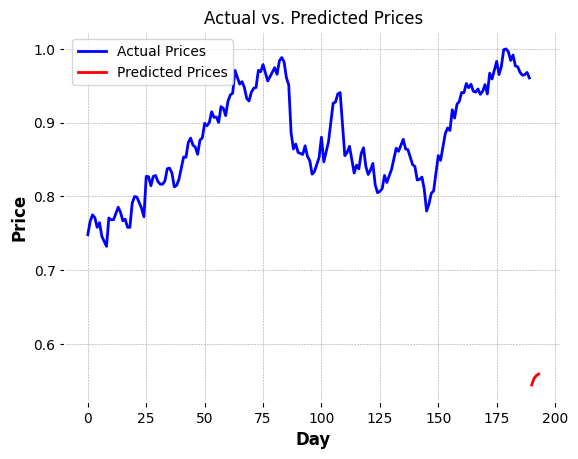

In [54]:
plt.plot(y_test, label='Actual Prices', color='blue')

# Plot the predicted prices
plt.plot(range(len(y_test), len(y_test) + len(predicted_prices)), predicted_prices, label='Predicted Prices', color='red')

# Add labels and legend
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()

# Show plot
plt.show()

In [48]:
pip install mplfinance


   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------------------------------- 75.0/75.0 kB 4.3 MB/s eta 0:00:00


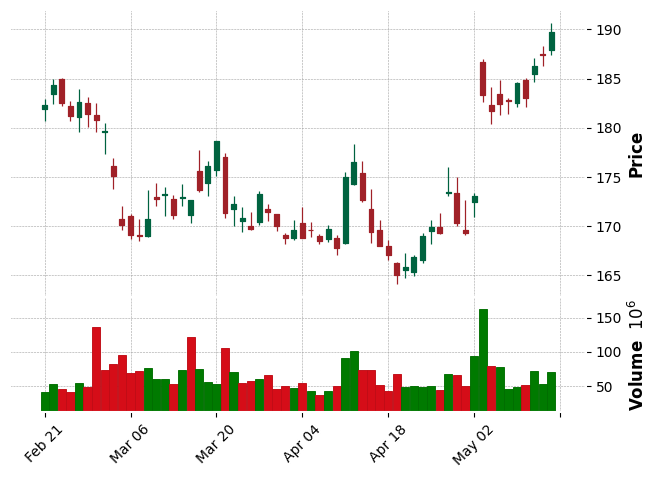

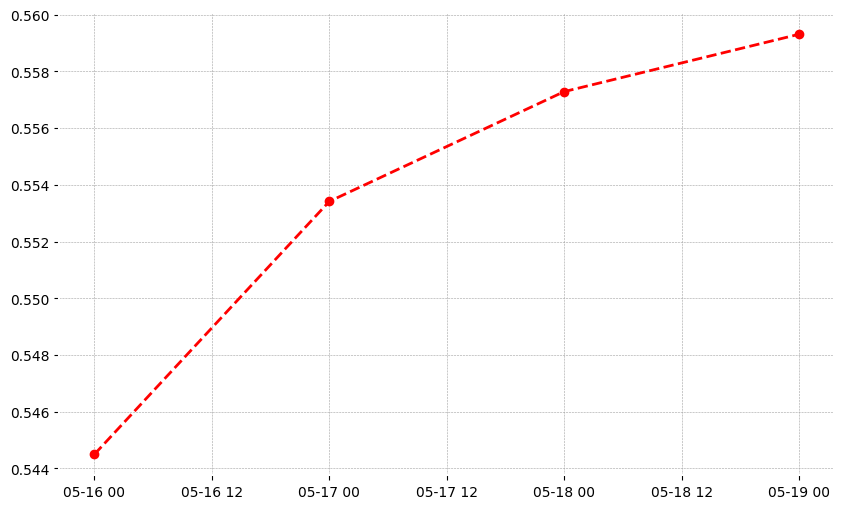

In [55]:
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the fetched AAPL stock data
# Make sure it contains Open, High, Low, Close, and Volume columns

# Creating a list of dates for the predictions
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Assuming 'predicted_prices' is your list of predicted prices for the next 4 days
predictions_df = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Plotting the actual data with mplfinance
mpf.plot(data, type='candle', style='charles', volume=True)

# Overlaying the predicted data
plt.figure(figsize=(10,6))
plt.plot(predictions_df.index, predictions_df['Close'], linestyle='dashed', marker='o', color='red')

